Group project codes

Team members 

Shabab Abdullah Omar                  1628543

Sheikh Md Hanif Hossain             1534721

Saad Bin Manna                              1539783

Serajee Nasheed Hossain            1620397

Atif Ahnaf Chowdhury                   1518335

Loading Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Loading dataset

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Recommender_System/MPU_GEO.csv')

Check the dataset

In [4]:
dataset.head()

,AUI0OLXAB3KKT,B004A9SDD8,5,1301184000
0,A1ZUSQ3TC3EC4C,B004A9SDD8,5.0,1321574400
1,AC05OAXD72X1V,B004A9SDD8,4.0,1367366400
2,A2RVMFOKBVM21I,B004A9SDD8,5.0,1350172800
3,A3NBSRGUWQGCMZ,B004A9SDD8,1.0,1300838400
4,A2KTVCVZJ8GPD2,B004A9SDD8,5.0,1393545600


In [0]:
# renaming our dataset in more meaningful name
dataset.columns = ['user_id', 'item_id', 'rating', 'timestamp' ]

## Exploratory Data Analysis

In [0]:
# detecting missing values
missing_values = dataset.isnull().sum()

Text(0.5, 1.0, 'Missing Values')

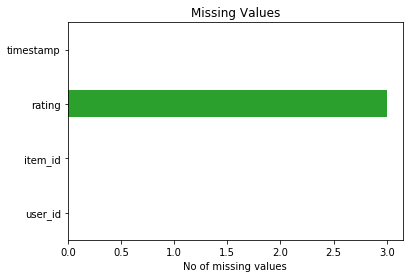

In [14]:
# plotting missing values
missing_values.plot.barh()
plt.xlabel("No of missing values")
plt.title("Missing Values")

In [0]:
# Filling missing values with mean
dataset['rating'].fillna(dataset['rating'].mean(), inplace=True)

In [28]:
# checking missing values isssue has solved or not
dataset.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [29]:
# total number of user, item and rating and timestamp
dataset.count()

user_id      1048575
item_id      1048575
rating       1048575
timestamp    1048575
dtype: int64

In [44]:
uniq = []
# total number of unique users
uniq.append(dataset.user_id.unique().size)
uniq.append(dataset.item_id.unique().size)
uniq

[643951, 18306]

Text(0.5, 1.0, 'Unique Customer and Item')

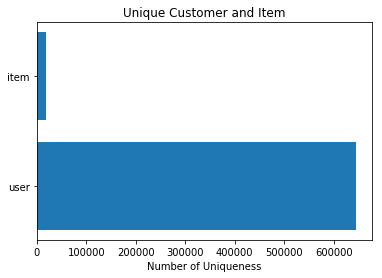

In [43]:
# As we can see we have 643951 unique user and 18306 unique item. Which means a single custer has rated multiple product.
# Which is key idea we need build our 
# recommender system.

# Now let's visualize it 
lev = ['user', 'item']
plt.barh(lev, uniq)
plt.xlabel('Number of Uniqueness')
plt.title('Unique Customer and Item')

In [0]:
rat = dataset.sort_values('rating')

In [17]:
rat.head()

,user_id,item_id,rating,timestamp
26,A394SVG55LLKEH,B004A9SDD8,1.0,1384819200
25,A282MHVBRTQDW,B004A9SDD8,1.0,1354147200
16,A1WWW804VWFAHH,B004A9SDD8,1.0,1404864000
18,AVYKSESEMLPE3,B004A9SDD8,1.0,1325894400
3,A3NBSRGUWQGCMZ,B004A9SDD8,1.0,1300838400


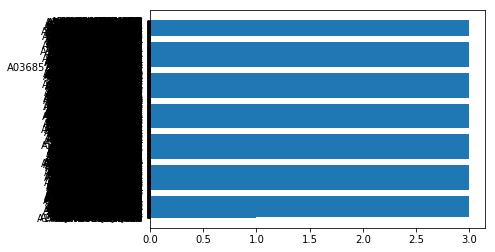

In [24]:
plt.barh(rat['user_id'].head(1000), rat['rating'].head(1000))
plt.show()

In [0]:

# Number of count for each unique item
item_count= dataset.item_id.value_counts()

In [47]:
item_count.describe()

count    18306.000000
mean        57.280400
std        428.501717
min          1.000000
25%          2.000000
50%          4.000000
75%         14.000000
max      25368.000000
Name: item_id, dtype: float64

Text(0, 0.5, 'No of count')

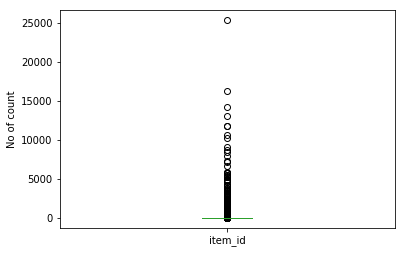

In [48]:
# box plot for item count
item_count.plot.box()
plt.ylabel('No of count')

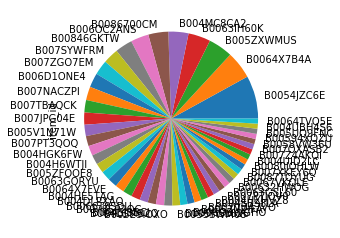

In [50]:
# pie chart for firt 50 unique item
item_count.head(50).plot.pie()
plt.show()

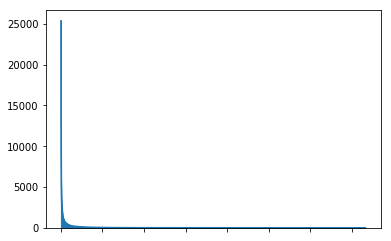

In [61]:
# pie chart for firt 50 unique item
item_count.plot.area()
plt.show()

In [0]:
# number of unique rating
rating_count = dataset.rating.value_counts()

In [56]:
rating_count.head()

3.000000    1048548
5.000000         18
1.000000          5
3.000026          3
4.000000          1
Name: rating, dtype: int64

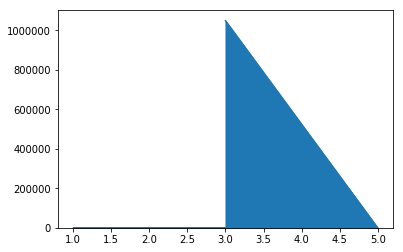

In [59]:
# It's clear that most of the user rated 3 

# Let's visualize it
rating_count.plot.area()

In [62]:
# Number of unique user count
user_count = dataset.user_id.value_counts()
user_count.head()

A3F3B6HY9RJI04    389
AX05DBU8IRUWY     377
A1X1CEGHTHMBL1    315
ACX8G3IW95BNE     221
A17KRI7HC6NF69    189
Name: user_id, dtype: int64

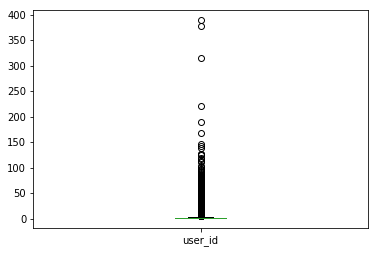

In [63]:
user_count.plot.box()

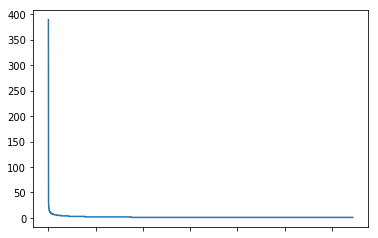

In [68]:
user_count.plot.line()

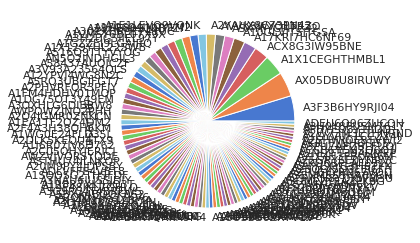

In [58]:
user_count.head(100).plot.pie()

Statistical summary

In [0]:
dataset.describe()

,rating,timestamp
count,1.048572e+06,1.048575e+06
mean,3.000026e+00,1.353307e+09
std,9.417615e-03,2.481804e+07
min,1.000000e+00,1.043453e+09
25%,3.000000e+00,1.332806e+09
50%,3.000000e+00,1.351987e+09
75%,3.000000e+00,1.371514e+09
max,5.000000e+00,1.406074e+09


After adding columns

In [0]:
dataset.head()

,user_id,item_id,rating,timestamp
0,A1ZUSQ3TC3EC4C,B004A9SDD8,5.0,1321574400
1,AC05OAXD72X1V,B004A9SDD8,4.0,1367366400
2,A2RVMFOKBVM21I,B004A9SDD8,5.0,1350172800
3,A3NBSRGUWQGCMZ,B004A9SDD8,1.0,1300838400
4,A2KTVCVZJ8GPD2,B004A9SDD8,5.0,1393545600


Converting users and items to categories

In [0]:
dataset.user_id = dataset.user_id.astype('category').cat.codes.values
dataset.item_id = dataset.item_id.astype('category').cat.codes.values

Create training and testing dataset

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2)

In [0]:
train.head()

,user_id,item_id,rating,timestamp
241771,642444,3358,3.0,1351209600
791278,325536,13769,3.0,1388016000
799900,315237,14076,3.0,1354924800
108895,560275,1093,3.0,1303257600
988197,165002,17333,3.0,1368662400


In [0]:
test.head()

,user_id,item_id,rating,timestamp
333424,419720,5424,3.0,1363737600
1014956,311588,17870,3.0,1350259200
379471,194703,6542,3.0,1355875200
434257,213740,7645,3.0,1367884800
197915,64776,2152,3.0,1325030400


Import libraries for deep learning

In [0]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot

n_users, n_items = len(dataset.user_id.unique()), len(dataset.item_id.unique())
n_latent_factors = 3

Using TensorFlow backend.


Create embeddings and format input 

In [0]:
item_input = keras.layers.Input(shape=[1],name='Item')
item_embedding = keras.layers.Embedding(n_items + 1, n_latent_factors, name='Item-Embedding')(item_input)
item_vec = keras.layers.Flatten(name='FlattenItems')(item_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))

prod = keras.layers.dot([item_vec, user_vec], axes = 1,name='DotProduct')
model = keras.Model([user_input, item_input], prod)
model.compile('adam', 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


Show the architecture of machine learning model

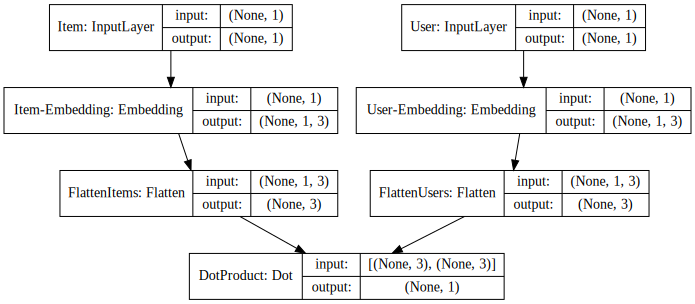

In [0]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

Model summary and learning parameters

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Item-Embedding (Embedding)      (None, 1, 3)         54921       Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 3)         1931856     User[0][0]                       
__________________________________________________________________________________________________
FlattenIte

In [0]:
history = model.fit([train.user_id, train.item_id], train.rating, epochs=100, verbose=0)

Instructions for updating:
Use tf.cast instead.


Same procedure but now with neural networks

In [0]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [0]:
y_hat = np.round(model.predict([test.user_id, test.item_id]),0)
y_true = test.rating

In [0]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_hat)

In [0]:
item_embedding_learnt = model.get_layer(name='Item-Embedding').get_weights()[0]
pd.DataFrame(item_embedding_learnt).describe()

In [0]:
user_embedding_learnt = model.get_layer(name='User-Embedding').get_weights()[0]
pd.DataFrame(user_embedding_learnt).describe()

In [0]:
n_latent_factors_user = 5
n_latent_factors_item = 8

item_input = keras.layers.Input(shape=[1],name='Item')
item_embedding = keras.layers.Embedding(n_items + 1, n_latent_factors_item, name='Item-Embedding')(item_input)
item_vec = keras.layers.Flatten(name='FlattenItems')(item_embedding)
item_vec = keras.layers.Dropout(0.2)(item_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
user_vec = keras.layers.Dropout(0.2)(user_vec)


concat = keras.layers.concatenate([item_vec, user_vec],name='Concat')
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
adam = Adam(lr=0.005)
model = keras.Model([user_input, item_input], result)
model.compile(optimizer=adam,loss= 'mean_absolute_error')

In [0]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [0]:
model.summary()

In [0]:
history = model.fit([train.user_id, train.item_id], train.rating, epochs=250, verbose=0)

Results

In [0]:
y_hat_2 = np.round(model.predict([test.user_id, test.item_id]),0)
print(mean_absolute_error(y_true, y_hat_2))

print(mean_absolute_error(y_true, model.predict([test.user_id, test.item_id])))